# Trabajo Práctico 1 - Teoría de Algoritmos II
**Nombre: Mateo Capón Blanquer**

**Padrón: 104258**



## Enunciado

Aclaraciones: Cada ejercicio dice al final del mismo la cantidad de puntos que otorga por hacerse completamente bien (en total, 15). Se deben obtener al menos 9 puntos para aprobar. Para la fecha de entregar, enviar un mail a mbuchwald@fi.uba.ar con un pdf con la resolución, con nombre TP1-PADRON.pdf. Pueden incluir todo el material adicional que les parezca relevante (desde código hasta gráficos).


Considerando esta red que representa las conexiones de diferentes países por los vuelos (directos) realizados entre ellos, responder las siguientes preguntas. A los fines de estos ejercicios, se puede obviar la última columna del archivo csv.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

df = pd.read_csv('World.csv')
# Uso nx.Graph porque son vuelos entre ellos (no dirigido).
G = nx.from_pandas_edgelist(df, edge_attr='ConexionAeropuertos',\
                            source='Origen', target='Destino', create_using=nx.Graph())
# Leo este dataset de paises con más información que la dada en el dataset Wordl.csv.
# Fuente: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/
gdf = gpd.read_file("ne_110m_admin_0_countries")

In [2]:
# Limpio algunos datos de World.csv para poder hacer merge con dataset con mas paises
to_replace = {
    "United States": "United States of America",
    "China": "People's Republic of China",
    "Cote d'Ivoire": "Ivory Coast",
    "Bahamas": "The Bahamas",
    "Gambia": "The Gambia",
    "Macedonia": "North Macedonia",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",
    "Congo (Brazzaville)": "Republic of the Congo",
    "Sao Tome and Principe": "São Tomé and Príncipe"   
}
df = df.replace(to_replace)

In [3]:
df = pd.merge(df, gdf, left_on="Origen", right_on="NAME_EN", how="left")
df = df[["ISO_A3", "Destino", "Origen", "CONTINENT", "ConexionAeropuertos"]]
df.rename(columns = {"ISO_A3":"Origen_ISO_A3", "CONTINENT":"Origen_CONTINENT"}, inplace = True)

df = pd.merge(df, gdf, left_on="Destino", right_on="NAME_EN", how="left")
df = df[["Origen_ISO_A3", "ISO_A3", "Origen", "Origen_CONTINENT", "Destino", "CONTINENT", "ConexionAeropuertos"]]
df.rename(columns = {"ISO_A3":"Destino_ISO_A3", "CONTINENT":"Destino_CONTINENT"}, inplace = True)

df

,Origen_ISO_A3,Destino_ISO_A3,Origen,Origen_CONTINENT,Destino,Destino_CONTINENT,ConexionAeropuertos
0,PNG,AUS,Papua New Guinea,Oceania,Australia,Oceania,19
1,PNG,PHL,Papua New Guinea,Oceania,Philippines,Asia,5
2,PNG,IDN,Papua New Guinea,Oceania,Indonesia,Asia,2
3,PNG,SLB,Papua New Guinea,Oceania,Solomon Islands,Oceania,2
4,PNG,HKG,Papua New Guinea,Oceania,Hong Kong,Asia,2
...,...,...,...,...,...,...,...
2847,LTU,GEO,Lithuania,Europe,Georgia,Asia,2
2848,ARM,GEO,Armenia,Asia,Georgia,Asia,1
2849,ERI,YEM,Eritrea,Africa,Yemen,Asia,4
2850,YEM,DJI,Yemen,Asia,Djibouti,Africa,5


In [ ]:
list(set(df[~ df["Origen"].isin(gdf["NAME_EN"])]["Origen"]))

In [ ]:
df_with_nan = df[df.isna().any(axis=1)]

print(f"El largo es {len(df_with_nan)}")
df_with_nan.head(40)

In [ ]:
data = {'Column1': [1, 2, 3],
        'Column2': ['A', 'B', 'C']}

df2 = pd.DataFrame(data)

# Define a row with NaN values
new_row = {'Column1': "asd"}

# Insert the new row into the DataFrame
df2 = df2.append(new_row, ignore_index=True)

df2

In [13]:
gdf

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


In [12]:
pos

{0: (117.2704333391668, -2.222961002517387),
 1: (109.6988684421668, 3.7923928509530205),
 2: (-71.36437476479367, -37.74360663523242),
 3: (-64.68475372880839, -16.7068768105592),
 4: (-74.37806457210715, -9.154388480752162),
 5: (-65.17307736953525, -35.37867944030587),
 6: (33.79299688069703, 35.01779631210754),
 7: (32.989991697320605, 34.91521704381189),
 8: (79.60712164529555, 22.887985895067196),
 9: (103.83259245836405, 36.55927332971446),
 10: (34.99700919427985, 31.44761212343349),
 11: (35.20065025911275, 31.91751322612234),
 12: (35.87983051612946, 33.920093267470115),
 13: (39.60055103486151, 8.622951736470814),
 14: (30.301119612240655, 7.283530707685558),
 15: (45.706144375313585, 4.748836792329111),
 16: (37.82243990624841, 0.5507660771276834),
 17: (34.28990780344176, -13.21722586468616),
 18: (34.81358642052762, -6.275097481093866),
 19: (38.504564757846076, 35.0230034604981),
 20: (46.25481907392482, 9.731015816127845),
 21: (-2.755221189920637, 42.18010698062937),
 

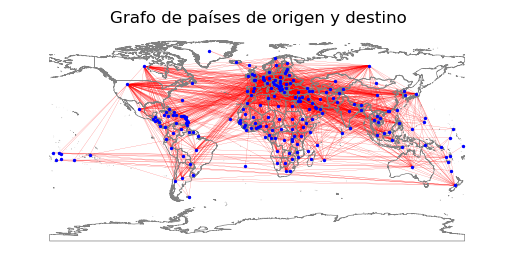

In [20]:
df_no_nan = df.dropna()
G_no_nan = nx.from_pandas_edgelist(df_no_nan, source='Origen', target='Destino', create_using=nx.Graph())

world = gdf.boundary.plot(color='gray', linewidth=0.5)
pos = {data["NAME_EN"]: (data['geometry'].centroid.x, data['geometry'].centroid.y) for country, data in gdf.iterrows()}
nx.draw(G_no_nan, pos, with_labels=False, width= 0.1, node_size=2, node_color='blue', edge_color='red', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')

plt.title('Grafo de países de origen y destino')
plt.show()


In [ ]:
print(f"La red tiene {G.number_of_nodes()} paises")

## Ejercicio 1 
Determinar: 

a. El diámetro de la red.

In [ ]:
print(f"El diámetro de la red es {nx.diameter(G)}")

b. El grado promedio de la red. 

In [ ]:
mean_degree = sum(dict(G.degree()).values()) / len(G)
print(f"El grado promedio de la red es {mean_degree}")

c. El coeficiente de clustering promedio de la red. 

In [ ]:
print(f"El coeficiente de clustering promedio de la red es {nx.average_clustering(G)}")

## Ejercicio 2 
a. Indicar si existe algún tipo de Homofilia y qué tipo de homofilia es. Si no hay homofilia por ningún criterio, explicar.
Justificar detalladamente.


b. Obtener una visualización de las comunidades presentes en dicha red (indicando el algoritmo utilizado).


c. Considerando lo mencionado en el punto (2.a), ¿corresponde lo encontrado por el algoritmo de detección de
comunidades en relación a lo indicado en dicho punto? ¿Se verifica que efectivamente hay homofilia, o no, según
hayas indicado? ¿como contrastan este resultado con lo indicado (y calculado) anteriormente?

In [ ]:
options = {
    'node_size': 10,
    'width': 1,
}
nx.draw(G, **options)



2. a. Indicar si existe algún tipo de Homofilia y qué tipo de homofilia es. Si no hay homofilia por ningún criterio, explicar. Justificar detalladamente. 
b. Obtener una visualización de las comunidades presentes en dicha red (indicando el algoritmo utilizado). c. Considerando lo mencionado en el punto (2.a), ¿corresponde lo encontrado por el algoritmo de detección de comunidades en relación a lo indicado en dicho punto? ¿Se verifica que efectivamente hay homofilia, o no, según hayas indicado? ¿como contrastan este resultado con lo indicado (y calculado) anteriormente? 
[3 puntos] 
3. a. Determinar un tipo de centralidad que podría ser útil calcular para esta red, justificando. b. Realizar una representación gráfica de dicha red, considerando la centralidad de los distintos países dada por la métrica del punto a (tamaño de los nodos proporcional a dicha métrica). 
[2 puntos] 
4. a. Obtener una simulación de un modelado de Erdös-Rényi que corresponda a los parámetros de esta red. b. Obtener una simulación de un modelado de Preferential Attachment (ley de potencias) que corresponda a los parámetros de esta red. 
c. Obtener una representación de anonymous walks tanto de la red original como para las dos simuladas en los puntos a y b. Determinar por distancia coseno cuál sería la simulación más afín. 
[3 puntos] 
5. a. Calcular los motifs de hasta 5 nodos de la subred definida en el punto 1.c. 
b. Calcular el promedio y desvío estandar de los motifs de una red de baseline. Calcular el significant profile de la red, y hacer un gráfico. 
c. Intentar dar con una explicación del resultado obtenido en el punto anterior [+1 punto]. 
[3 puntos] (sin contar 2.c) 
6. Detectar los roles en dicha red utilizando el algoritmo RolX, explicando el resultado obtenido. [2 punto] 
7. 
[1 punto]


## Ejercicio 7
Determinar los puentes (globales o locales) en dicha red. 

In [ ]:
list(nx.bridges(G))